# Basic Structure
#### 1. Import image and make a list of white pixels of image called coordinates
#### 2. Calculating optimal K value by plotting a elbow graph using wcss
#### 3. Use this optimal K value derived to run K means algo one more time and make scatter plot of clusters
#### 4. Find distances between cluster centroids

In [65]:
from PIL import Image
import numpy as np
import pandas as pd
import math as m
import random
import matplotlib.pyplot as plt

#storing image path
image_path = 'C:/Users/Himanshu Malik/Desktop/Task 2 Samples/1.png'

# Open the image using Pillow
img = Image.open(image_path)

# Convert the PIL image to a NumPy array
img_array = np.array(img)

# Print the image array shape (width, height, channels)
print(img_array.shape)

(64, 64, 4)


In [66]:
# Initialize an empty list to store coordinates
coordinates = []

# Loop through each pixel in the image array
for y in range(64):
    for x in range(64):
        if np.array_equal(img_array[y, x], [255, 255, 255, 255]):
            # Appending the coordinates to the list
            coordinates.append([x, y])

print(coordinates)


[[60, 12], [59, 13], [60, 14], [58, 16], [59, 16], [55, 17], [57, 17], [58, 17], [60, 17], [61, 17], [62, 17], [63, 17], [55, 18], [56, 18], [59, 18], [61, 18], [62, 18], [60, 19], [61, 19], [63, 19], [50, 20], [54, 20], [57, 20], [58, 20], [59, 20], [60, 20], [54, 21], [58, 21], [60, 21], [63, 21], [58, 22], [59, 22], [55, 23], [56, 23], [55, 24], [57, 25], [54, 26], [58, 26], [62, 26], [11, 28], [13, 29], [15, 29], [17, 29], [18, 29], [19, 29], [14, 30], [17, 30], [19, 30], [21, 30], [61, 30], [15, 31], [16, 31], [20, 31], [21, 31], [13, 32], [14, 32], [16, 32], [18, 32], [19, 32], [41, 32], [16, 33], [17, 33], [18, 33], [20, 33], [44, 33], [14, 34], [15, 34], [16, 34], [17, 34], [18, 34], [20, 34], [41, 34], [10, 35], [15, 35], [16, 35], [17, 35], [18, 35], [19, 35], [38, 35], [41, 35], [43, 35], [14, 36], [15, 36], [16, 36], [39, 36], [42, 36], [45, 36], [12, 37], [13, 37], [15, 37], [38, 37], [42, 37], [44, 37], [47, 37], [17, 38], [21, 38], [36, 38], [37, 38], [40, 38], [41, 38],

In [67]:
#to find distance between two we use this function
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

In [68]:
#we use this one to calculate geometric mean of many coordinates, we pass values of dictionary here and calculate geometric mean
def geometric_mean(coords):
    num_points = len(coords)
    if num_points == 0:
        return None
    product_x = 1
    product_y = 1
    for coord in coords:
        product_x *= coord[0]
        product_y *= coord[1]
    return (product_x ** (1/num_points), product_y ** (1/num_points))

In [69]:
"""this function is used to calculate wcss, we do this simply by asking for centroids for which you want wcss and
centroid dictionary to get the points that belong to this centroid"""
def calculate_wcss(centroids, centroid_dict):
    wcss = 0
    for i, centroid in enumerate(centroids):
        for coord in centroid_dict[i]:
            wcss += distance(coord, centroid) ** 2
    return wcss

Enter the number of iterations you want? 10
Enter the number of cluster (k) you want to make the elbow graph 10


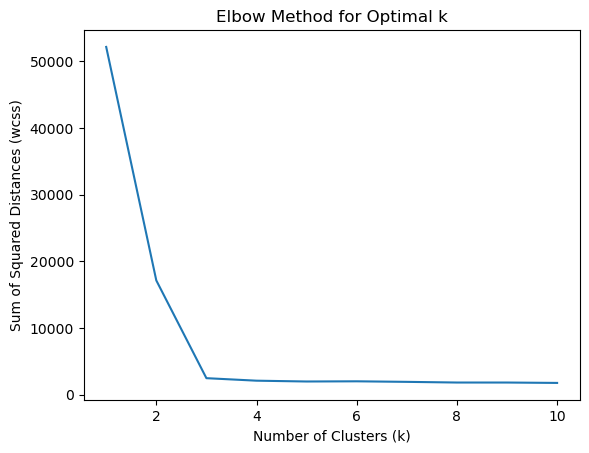

In [70]:
#asking user for number of iterations they want for calculating each K
num_iterations=int(input("Enter the number of iterations you want?"))

wcss_values = []

#asking for upper limit of range for which the user may want the elbow graph
upper=int(input("Enter the number of cluster (k) you want to make the elbow graph"))
k_values = range(1, upper+1)  # you can change the range to whatever you need, by default it is 10

# loop through each k value
for k in k_values:
    centroids = coordinates[:k]  # initialize centroids, it doesn't matter which centroids we choose, so instead of making a random function i just chose first few centroids
    labels = [0] * len(coordinates) #this is done to initialize a list with all elements as zero, it will be used to store labels of each coordinate
    centroid_dict = {i: [] for i in range(len(centroids))} #a dictionary that has key as centroids and values as coordinates assigned to that centroid
    
    # loop through each coordinate and assign each coordinate to the centroid for which it is closest
    for coord in coordinates:
        min_distance = float('inf')
        min_index = -1
        for centroid_index, centroid in enumerate(centroids):
            dist = distance(coord, centroid)
            if dist < min_distance:
                min_distance = dist
                min_index = centroid_index
        labels[coordinates.index(coord)] = min_index #assigns the label to the coordinate
        centroid_dict[min_index].append(coord)

    #we rerun similar loops for updating new centroids
    #iterate to find new centroids
    for _ in range(num_iterations):
        new_centroids = [geometric_mean(coords) for coords in centroid_dict.values() if coords] #calculate g mean of all the coordinates assigned to a centroid
        if new_centroids == centroids: #condition to prevent from wasteful iterations
            break
        centroids = new_centroids
        centroid_dict = {i: [] for i in range(len(centroids))} #clearin the old dictionary values to assign new values
        for coord in coordinates:
            min_distance = float('inf')
            min_index = -1
            for centroid_index, centroid in enumerate(centroids):
                dist = distance(coord, centroid)
                if dist < min_distance:
                    min_distance = dist
                    min_index = centroid_index
            labels[coordinates.index(coord)] = min_index
            centroid_dict[min_index].append(coord)
    
    wcss = calculate_wcss(centroids, centroid_dict) #calculating wcss for each centroid at last and then storing it
    wcss_values.append(wcss)


# plotting the elbow curve
plt.plot(k_values, wcss_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (wcss)')
plt.title('Elbow Method for Optimal k')
plt.show()


Give me optimal K value using graph 5


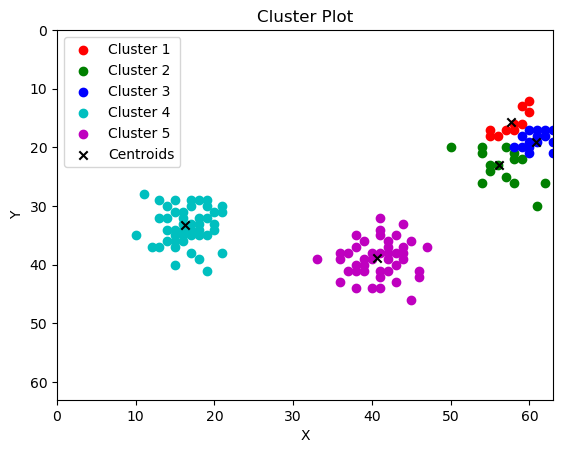

In [71]:
#by seeing previous graph i want you to input optimal k value, i wanted to automate this, but was getting wrong outputs and couldn't figure it out in given time
optimal_k = int(input("Give me optimal K value using graph"))

# this is basically re running the k mean we used previously, this time just for optimal cluster number
centroids = coordinates[:optimal_k]

labels = [0] * len(coordinates)
centroid_dict = {i: [] for i in range(len(centroids))}

for coord in coordinates:
    min_distance = float('inf')
    min_index = -1
    for centroid_index, centroid in enumerate(centroids):
        dist = distance(coord, centroid)
        if dist < min_distance:
            min_distance = dist
            min_index = centroid_index
    labels[coordinates.index(coord)] = min_index
    centroid_dict[min_index].append(coord)

for _ in range(num_iterations):
    new_centroids = [geometric_mean(coords) for coords in centroid_dict.values() if coords]
    if new_centroids == centroids:
        break
    centroids = new_centroids
    centroid_dict = {i: [] for i in range(len(centroids))}
    for coord in coordinates:
        min_distance = float('inf')
        min_index = -1
        for centroid_index, centroid in enumerate(centroids):
            dist = distance(coord, centroid)
            if dist < min_distance:
                min_distance = dist
                min_index = centroid_index
        labels[coordinates.index(coord)] = min_index
        centroid_dict[min_index].append(coord)

# plotting clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i, centroid in enumerate(centroids):
    cluster_coords = centroid_dict[i] #extracting coordinates of points assigned to each centroid
    color = colors[i % len(colors)] #cyles through color if the end of list is reached
    cluster_x = [coord[0] for coord in cluster_coords] #bifurcating x and y coordinates to plot them
    cluster_y = [coord[1] for coord in cluster_coords]
    plt.scatter(cluster_x, cluster_y, c=color, label=f'Cluster {i+1}')

# to plot centroids in different way than other coordinates
centroid_x = [centroid[0] for centroid in centroids]
centroid_y = [centroid[1] for centroid in centroids]
plt.scatter(centroid_x, centroid_y, marker='x', c='k', label='Centroids')

"""i was encountering a problem in which the graph was inverted wrt x axis so I found this command and use it here,
this can be due to the fact that we scan image from top left corner, so (0,0) is top left corner and not bottom left"""
plt.gca().invert_yaxis() 

# some part of the graph was not being shown, it was making problem in comparing, so i set the limit
plt.xlim(0, 63)
plt.ylim(63,0)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster Plot')
plt.legend()
plt.show()

In [73]:
#calculating distances between centroids
centroid_distances = {} #empty dictionary to store them
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        dist = distance(centroids[i], centroids[j])
        centroid_distances[(i, j)] = dist


#print distances between centroids
for pair, dist in centroid_distances.items():
    index1, index2 = pair
    print(f"Distance between Centroids {index1} and {index2}: {dist}")

Distance between Centroids 0 and 1: 7.420198374226337
Distance between Centroids 0 and 2: 4.66347368854961
Distance between Centroids 0 and 3: 45.0276857208285
Distance between Centroids 0 and 4: 28.701091684029183
Distance between Centroids 1 and 2: 6.129306894041455
Distance between Centroids 1 and 3: 41.17233471567148
Distance between Centroids 1 and 4: 22.12037110723569
Distance between Centroids 2 and 3: 46.83033445852903
Distance between Centroids 2 and 4: 28.212463854651965
Distance between Centroids 3 and 4: 25.07479403896404
